In [2]:
import ginsim
import biolqm
from colomoto_jupyter import tabulate
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

cmp = sns.diverging_palette(0, 255, as_cmap=True)

This notebook has been executed using the docker image `colomoto/colomoto-docker:2021-10-01`

# 1. Loading the two models of interest

- The CaSQ-generated RASF-specific boolean model;
- MitoCore constraint-based model of human metabolism.

## 1. 1. Load the RASF-model

In [3]:
RASF_model = biolqm.load("RASF-model.sbml")

The sanitize function is used to generate human-friendly node IDs and rescale the layout to improve the model's readability.


*Note: this cell may take a few minutes to run.*

In [4]:
RASF_model = biolqm.sanitize(RASF_model)

layout = RASF_model.getLayout()
layout.scale(0.4)

lrg = biolqm.to_ginsim(RASF_model)

ginsim.show(lrg, save="RASF-model.svg")

/notebook/persistent/Sahar/RASF-model.svg

## 1.2. Load MitoCore 

In [5]:
try:
    import cobra
except ImportError:
    import sys
    !{sys.executable} -m pip install cobra
    import cobra

In [6]:
MitoCore = cobra.io.read_sbml_model('mitocore_v1.01.xml')

Model does not contain SBML fbc package information.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_10fthf_c "10-Formyltetrahydrofolate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf_c "10-Formyltetrahydrofolate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_10fthf_m "10-Formyltetrahydrofolate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf_m "10-Formyltetrahydrofolate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_13dpg_c "3-Phospho-D-glyceroyl phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_13dpg_c "3-Phospho-D-glyceroyl phosphate">
Use of CHARGE i

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3pg_c "3-Phospho-D-glycerate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3php_c "3-Phosphonooxypyruvate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3php_c "3-Phosphonooxypyruvate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3sala_c "3-Sulfino-L-alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3sala_c "3-Sulfino-L-alanine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3snpyr_c "3-Sulfinylpyruvate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_3snpyr_c "3-Sulfinylpyruvate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_3tetd7ecoa_m "trans-Tetradec-2-enoyl-CoA">
Use of F

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ahcys_c "S-Adenosyl-L-homocysteine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_akg_c "2-Oxoglutarate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_akg_c "2-Oxoglutarate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_akg_e "2-Oxoglutarate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_akg_e "2-Oxoglutarate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_akg_m "2-Oxoglutarate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_akg_m "2-Oxoglutarate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ala_B_c "beta-Alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemica

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_bilirub_e "Bilirubin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_bilirub_e "Bilirubin">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_biliverd_c "Biliverdin">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_biliverd_c "Biliverdin">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_biomass_c "Biomass">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_biomass_c "Biomass">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_biomass_e "Biomass">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_biomass_e "Biomass">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_biomas

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_crn_m "L-Carnitine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_crn_m "L-Carnitine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ctp_m "CTP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ctp_m "CTP">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cyan_c "Cyanide ion">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cyan_c "Cyanide ion">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cyan_e "Cyanide ion">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cyan_e "Cyanide ion">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cyan_m "Cyanide ion">
Use of F

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_g6p_c "D-Glucose 6-phosphate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gdp_c "GDP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gdp_c "GDP">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_gdp_m "GDP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_gdp_m "GDP">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_glc_D_c "D-Glucose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glc_D_c "D-Glucose">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_glc_D_e "D-Glucose">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_glc_D_e "D-Glucose">
Use of CH

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_h2o2_c "Hydrogen peroxide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_h2o2_c "Hydrogen peroxide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_h2o2_m "Hydrogen peroxide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_h2o2_m "Hydrogen peroxide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_HC00250_c "Hydrogen sulfide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC00250_c "Hydrogen sulfide">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_HC00250_e "Hydrogen sulfide">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC00250_e "Hydrogen sulfide">
Use of CHARGE in the notes element is di

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_imp_c "IMP">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ivcoa_m "3-Methylbutanoyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ivcoa_m "3-Methylbutanoyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_L2aadp_c "L-2-Aminoadipate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_L2aadp_c "L-2-Aminoadipate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_L2aadp_m "L-2-Aminoadipate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_L2aadp_m "L-2-Aminoadipate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_L2aadp6sa_c "L-2-Aminoadipate 6-semialdehyde">
Use of FORMULA in the notes elem

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_mmcoa_S_m "(S)-Methylmalonyl-CoA">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mmcoa_S_m "(S)-Methylmalonyl-CoA">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_msa_m "3-Oxopropanoate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_msa_m "3-Oxopropanoate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_mthgxl_m "Methylglyoxal">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_mthgxl_m "Methylglyoxal">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_n4abutn_m "N4-Acetylaminobutanal">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_n4abutn_m "N4-Acetylaminobutanal">
Use of CHARGE in the notes ele

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pcreat_m "Phosphocreatine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pe_hs_c "Phosphatidylethanolamine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pe_hs_c "Phosphatidylethanolamine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pe_hs_e "Phosphatidylethanolamine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pe_hs_e "Phosphatidylethanolamine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pe_hs_m "Phosphatidylethanolamine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pe_hs_m "Phosphatidylethanolamine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pep_c "Phosphoenolpyruvate">

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pser_L_c "O-Phospho-L-serine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ptrc_c "Putrescine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ptrc_c "Putrescine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ptrc_m "Putrescine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ptrc_m "Putrescine">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pyr_c "Pyruvate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pyr_c "Pyruvate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_pyr_m "Pyruvate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_pyr_m "

Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_trp_L_e "L-Tryptophan">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_trp_L_e "L-Tryptophan">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_trp_L_m "L-Tryptophan">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_trp_L_m "L-Tryptophan">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_tsul_c "Thiosulfate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tsul_c "Thiosulfate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_tsul_e "Thiosulfate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_tsul_e "Thiosulfate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_ts

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC01323_c "(R)-3-Hydroxyoctanoyl-ACP">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_HC01594_c "(2E)-Octenoyl-ACP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC01594_c "(2E)-Octenoyl-ACP">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_HC01595_c "Octanoyl-ACP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC01595_c "Octanoyl-ACP">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_HC01596_c "3-Oxodecanoyl-ACP">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_HC01596_c "3-Oxodecanoyl-ACP">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_HC01322_c "(R)-3-Hydroxydecanoyl-ACP">
Use of FORMULA in 

Adding exchange reaction EX_lys_L_e with default bounds for boundary metabolite: lys_L_e.
Adding exchange reaction EX_mal_L_e with default bounds for boundary metabolite: mal_L_e.
Adding exchange reaction EX_mercplac_e with default bounds for boundary metabolite: mercplac_e.
Adding exchange reaction EX_met_L_e with default bounds for boundary metabolite: met_L_e.
Adding exchange reaction EX_nad_e with default bounds for boundary metabolite: nad_e.
Adding exchange reaction EX_nadh_e with default bounds for boundary metabolite: nadh_e.
Adding exchange reaction EX_nh4_e with default bounds for boundary metabolite: nh4_e.
Adding exchange reaction EX_no_e with default bounds for boundary metabolite: no_e.
Adding exchange reaction EX_o2_e with default bounds for boundary metabolite: o2_e.
Adding exchange reaction EX_oaa_e with default bounds for boundary metabolite: oaa_e.
Adding exchange reaction EX_pchol_hs_e with default bounds for boundary metabolite: pchol_hs_e.
Adding exchange reaction

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PEPCK "R_PEPCK GTP + oxaloacetate --> GDP + phosphoenolpyruvate + CO2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PEPCK "R_PEPCK GTP + oxaloacetate --> GDP + phosphoenolpyruvate + CO2">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LDH_L "Pyruvate + NADH + H+ --> R_LDH_L (S)-Lactate + NAD+">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LDH_L "Pyruvate + NADH + H+ --> R_LDH_L (S)-Lactate + NAD+">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_G6PDH2r "R_G6PDH2r beta-D-Glucose 6-phosphate + NADP+ --> D-Glucono-1,5-lactone 6-phosphate + NADPH + H+">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discourage

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CIII_MitoCore "R_CIII_MitoCore cytochrome c reductase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CIII_MitoCore "R_CIII_MitoCore cytochrome c reductase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CIV_MitoCore "R_CIV_MitoCore cytochrome c oxidase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CIV_MitoCore "R_CIV_MitoCore cytochrome c oxidase">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_CV_MitoCore "R_CV_MitoCore ATP synthase">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_CV_MitoCore "R_CV_MitoCore ATP synthase">
Encoding LOWER_BOUND and UPPER_BOUND 

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ASPTAm "R_ASPTAm L-Aspartate + 2-Oxoglutarate --> Oxaloacetate + L-Glutamate">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ASPTAm "R_ASPTAm L-Aspartate + 2-Oxoglutarate --> Oxaloacetate + L-Glutamate">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_G3PD1 "R_G3PD1 sn-Glycerol 3-phosphate + NAD+ --> Glycerone phosphate + NADH + H+">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_G3PD1 "R_G3PD1 sn-Glycerol 3-phosphate + NAD+ --> Glycerone phosphate + NADH + H+">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0205 "R_r0205 sn-Glycerol 3-phosphate + Ubiquinone --> Glycerone phosphate + Ubiquinol">
Use of GENE ASSOCIATION or GENE_ASS

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1451 "R_r1451 Decanoyl-CoA + Q -->trans-Dec-2-enoyl-CoA + QH2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r1451 "R_r1451 Decanoyl-CoA + Q -->trans-Dec-2-enoyl-CoA + QH2">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0735 "R_r0735 Decanoyl-CoA + NADP+ --> trans-Dec-2-enoyl-CoA + NADPH + H+">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0735 "R_r0735 Decanoyl-CoA + NADP+ --> trans-Dec-2-enoyl-CoA + NADPH + H+">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0728 "R_r0728 (S)-Hydroxydecanoyl-CoA --> trans-Dec-2-enoyl-CoA + H2O">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr i

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0678 "R_r0678 Acetyl-[acyl-carrier protein] + Malonyl-[acyl-carrier protein] --> Acetoacetyl-[acp] + CO2 + Acyl-carrier protein">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0691 "R_r0691 (3R)-3-Hydroxybutanoyl-[acyl-carrier protein] + NADP+ --> Acetoacetyl-[acp] + NADPH + H+">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0691 "R_r0691 (3R)-3-Hydroxybutanoyl-[acyl-carrier protein] + NADP+ --> Acetoacetyl-[acp] + NADPH + H+">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0681 "R_r0681 3R)-3-Hydroxybutanoyl-[acyl-carrier protein] --> But-2-enoyl-[acyl-carrier protein] + H2O">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <React

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0713 "R_r0713 Dodecanoyl-[acyl-carrier protein] + Malonyl-[acyl-carrier protein] --> 3-Oxotetradecanoyl-[acp] + CO2 + Acyl-carrier protein">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0701 "R_r0701 (3R)-3-Hydroxytetradecanoyl-[acyl-carrier protein] + NADP+ --> 3-Oxotetradecanoyl-[acp] + NADPH + H+">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0701 "R_r0701 (3R)-3-Hydroxytetradecanoyl-[acyl-carrier protein] + NADP+ --> 3-Oxotetradecanoyl-[acp] + NADPH + H+">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0702 "R_r0702 (3R)-3-Hydroxytetradecanoyl-[acyl-carrier protein] --> trans-Tetradec-2-enoyl-[acp] + H2O">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is disco

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_OIVD3m "R_OIVD3m NAD+ + CoA + (S)-3-Methyl-2-oxopentanoicacid -> NADH + CO2 + (S)-2-Methylbutanoyl-CoA">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0603 "R_r0603 (S)-2-Methylbutanoyl-CoA + Q --> 2-Methylbut-2-enoyl-CoA + QH2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0603 "R_r0603 (S)-2-Methylbutanoyl-CoA + Q --> 2-Methylbut-2-enoyl-CoA + QH2">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ECOAH9m "R_ECOAH9m 2-Methylbut-2-enoyl-CoA + H2O --> (2S,3S)-3-Hydroxy-2-methylbutanoyl-CoA">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ECOAH9m "R_ECOAH9m 2-Methylbut-2-enoyl-CoA + H2O --> (2S,3S)-3-Hydroxy-2-methylbutano

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_METAT "R_METAT ATP + L-Methionine + H2O --> Orthophosphate + Diphosphate + S-Adenosyl-L-methionine">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_METAT "R_METAT ATP + L-Methionine + H2O --> Orthophosphate + Diphosphate + S-Adenosyl-L-methionine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_METAT2_MitoCore "R_METAT2_MitoCore S-Adenosyl-L-methionine + demethylated methyl donor --> S-Adenosyl-L-homocysteine + methyl donor">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_METAT2_MitoCore "R_METAT2_MitoCore S-Adenosyl-L-methionine + demethylated methyl donor --> S-Adenosyl-L-homocysteine + methyl donor">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds in

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_3HAO "R_3HAO 3-Hydroxyanthranilate + Oxygen --> 2-Amino-3-carboxymuconate semialdehyde">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_PCLAD "R_PCLAD 2-Amino-3-carboxymuconate semialdehyde --> 2-Aminomuconate semialdehyde + CO2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_PCLAD "R_PCLAD 2-Amino-3-carboxymuconate semialdehyde --> 2-Aminomuconate semialdehyde + CO2">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0645 "R_r0645 2-Aminomuconate semialdehyde + NAD+ + H2O --> 2-Aminomuconate + H+ + NADH">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0645 "R_r0645 2-Aminomuconate semialdehyde + NAD+ + H2O --> 2-Aminomucona

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0594 "R_r0594 L-2-Aminoadipate6-semialdehyde+NAD++H2O-->L-2-Aminoadipate+NADH+H+">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0594 "R_r0594 L-2-Aminoadipate6-semialdehyde+NAD++H2O-->L-2-Aminoadipate+NADH+H+">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_2AMADPTmB_MitoCore "R_2AMADPTmB_MitoCore Oxodicarboxylate carrier (ODC) - L-aminoadipate (in) for oxoglutarate (out)">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_2AMADPTmB_MitoCore "R_2AMADPTmB_MitoCore Oxodicarboxylate carrier (ODC) - L-aminoadipate (in) for oxoglutarate (out)">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_2AMADPTmC_MitoCore "R_2AMADPTmC_MitoCore Oxod

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_4aabutn_MitoCore "R_4aabutn_MitoCore 4-Acetamidobutanoate + H2O --> 4-Aminobutanoate + Acetate">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLUDC "R_GLUDC L-Glutamate --> 4-Aminobutanoate + CO2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GLUDC "R_GLUDC L-Glutamate --> 4-Aminobutanoate + CO2">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_4ABUTtm "R_4ABUTtm 4-aminobutanoate (GABA) mitochondrial transport">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_4ABUTtm "R_4ABUTtm 4-aminobutanoate (GABA) mitochondrial transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <R

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FTHFDH "R_FTHFDH 10-Formyltetrahydrofolate + NADP+ + H2O --> Tetrahydrofolate + CO2 + NADPH + H+">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_FTHFDH "R_FTHFDH 10-Formyltetrahydrofolate + NADP+ + H2O --> Tetrahydrofolate + CO2 + NADPH + H+">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r0060 "R_r0060 L-Serine --> Pyruvate + Ammonia">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_r0060 "R_r0060 L-Serine --> Pyruvate + Ammonia">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GHMT2rm "R_GHMT2rm Tetrahydrofolate + L-Serine --> 5,10-Methylenetetrahydrofolate + Glycine + H2O">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the note

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_OCBTm "R_OCBTm Carbamoyl phosphate + L-Ornithine --> Orthophosphate + L-Citrulline">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NOS1 "R_NOS1 L-Arginine + Oxygen + NADPH + H+ --> N-(omega)-Hydroxyarginine + NADP+ + H2O">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NOS1 "R_NOS1 L-Arginine + Oxygen + NADPH + H+ --> N-(omega)-Hydroxyarginine + NADP+ + H2O">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_NOS2 "R_NOS2 NADPH + 2 N-(omega)-Hydroxyarginine + 2 Oxygen + H+ --> NADP+ + 2 Nitric oxide + 2 L-Citrulline + 2 H2O">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_NOS2 "R_NOS2 NADPH + 2 N-(omega)-Hydroxyarginine + 2 Oxy

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MMSAD3m "R_MMSAD3m 3-Oxopropanoate + CoA + NAD+ --> Acetyl-CoA + CO2 + NADH + H+">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MMSAD3m "R_MMSAD3m 3-Oxopropanoate + CoA + NAD+ --> Acetyl-CoA + CO2 + NADH + H+">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_MMSAD3m2_MitoCore "R_MMSAD3m2_MitoCore 3-Oxopropanoate + CoA + NADP+ --> Acetyl-CoA + CO2 + NADPH + H+">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_MMSAD3m2_MitoCore "R_MMSAD3m2_MitoCore 3-Oxopropanoate + CoA + NADP+ --> Acetyl-CoA + CO2 + NADPH + H+">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_ASP1DC "R_ASP1DC L-Aspartate --> beta-Alanine + CO2">
Use of GENE ASSOCIATI

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HMBS "R_HMBS 4 Porphobilinogen + H2O --> Hydroxymethylbilane + 4 Ammonia">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_HMBS "R_HMBS 4 Porphobilinogen + H2O --> Hydroxymethylbilane + 4 Ammonia">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UPP3S "R_UPP3S Hydroxymethylbilane --> Uroporphyrinogen III + H2O">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_UPP3S "R_UPP3S Hydroxymethylbilane --> Uroporphyrinogen III + H2O">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_UPPDC1 "R_UPPDC1 Uroporphyrinogen III --> Coproporphyrinogen III + 4 CO2">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:g

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SPODMm "R_SPODMm 2 O2.- + 2 H+ --> H2O2 + Oxygen">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_SPODMm "R_SPODMm 2 O2.- + 2 H+ --> H2O2 + Oxygen">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GTHP "R_GTHP H2O2 + 2 Glutathione --> Glutathione disulfide + 2 H2O">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GTHP "R_GTHP H2O2 + 2 Glutathione --> Glutathione disulfide + 2 H2O">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GTHPm "R_GTHPm H2O2 + 2 Glutathione --> Glutathione disulfide + 2 H2O">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_GTHPm "R_GTHPm H2O2 + 2

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_COAtmB_MitoCore "R_COAtmB_MitoCore CoA carrier (CoAPC) - antiport CoA for AMP">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_COAtmB_MitoCore "R_COAtmB_MitoCore CoA carrier (CoAPC) - antiport CoA for AMP">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_COAtmC_MitoCore "R_COAtmC_MitoCore CoA carrier (CoAPC) - antiport CoA for ADP">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_COAtmC_MitoCore "R_COAtmC_MitoCore CoA carrier (CoAPC) - antiport CoA for ADP">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLUt2mB_MitoCore "R_GLUt2mB_MitoCore Glutamate Carrier (GC2) - Symport L-glutamate with proton together">
Use of GENE ASSOCIATION o

Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_ILEt5m "R_ILEt5m Unknown amino acid carrier - L-Isoleucine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_LEUt5m "R_LEUt5m Unknown amino acid carrier - L-Leucine">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_LEUt5m "R_LEUt5m Unknown amino acid carrier - L-Leucine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_VALt5m "R_VALt5m Unknown amino acid carrier - L-Valine">
Use of GENE ASSOCIATION or GENE_ASSOCIATION in the notes element is discouraged, use fbc:gpr instead: <Reaction R_VALt5m "R_VALt5m Unknown amino acid carrier - L-Valine">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_r1434 "R_r1434 Unknown amino acid carrier - L-

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HCO3t_MitoCore "R_HCO3t_MitoCore Bicarbonate diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_GLCt1r "R_GLCt1r glucose transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HDCAtr "R_HDCAtr fatty acid transport via diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_HDCAtm_MitoCore "R_HDCAtm_MitoCore fatty acid accumulation - mitochondria">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_L_LACt2r "R_L_LACt2r L-lactate reversible transport via proton symport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_BHBt "R_BHBt (R)-3-Hydroxybutanoate transport via H+ symport"

Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_FE2t "R_FE2t iron (II) transport">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_H2Ot "R_H2Ot H2O transport via diffusion">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Hct_MitoCore "R_Hct_MitoCore Proton escape - cytosolic">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_Hmt_MitoCore "R_Hmt_MitoCore Proton escape - mitochondrial">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_SO3t_MitoCore "R_SO3t_MitoCore Sulfite">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc:fluxBounds instead: <Reaction R_TSULt_MitoCore "R_TSULt_MitoCore Thiosulfate">
Encoding LOWER_BOUND and UPPER_BOUND in KineticLaw is discouraged, use fbc

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PDHm "R_PDHm Pyruvate + CoA + NAD+ --> Acetyl-CoA + CO2 + NADH + H+">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CSm "R_CSm Acetyl-CoA + H2O + Oxaloacetate --> Citrate + CoA">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACONTm "R_ACONTm Citrate -> Isocitrate">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ICDHxm "R_ICDHxm Isocitrate + NAD(+) = 2-oxoglutarate + CO(2) + NADH">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ICDHyrm "R_ICDHyrm Isocitrate + NADP(+) -> 2-oxoglutarate + CO(2) + NADPH">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_AKGDm "R_AKGDm 2-Oxoglutarate + CoA + NAD+ --> Succinyl

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MTPC16_MitoCore "R_MTPC16_MitoCore trans-Hexadec-2-enoyl-CoA + H2O + NAD+ + CoA -> Tetradecanoyl-CoA + NADH + Acetyl-CoA">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ACADLC14_MitoCore "R_ACADLC14_MitoCore Tetradecanoyl-CoA + Q --> trans-Tetradec-2-enoyl-CoA + QH2">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MECR14C_MitoCore "R_MECR14C_MitoCore trans-Tetradec-2-enoyl-CoA + NADPH + H+ --> Tetradecanoyl-CoA + NADP+">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MTPC14_MitoCore "R_MTPC14_MitoCore trans-Hexadec-2-enoyl-CoA + H2O + NAD+ + CoA -> Lauroyl-CoA + NADH + Acetyl-CoA">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1447 "R_r1447 Lauroyl-CoA + Q 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0692 "R_r0692 (3R)-3-Hydroxydecanoyl-[acyl-carrier protein] + NADP+ --> 3-Oxodecanoyl-[acp] + NADPH">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0693 "R_r0693 (3R)-3-Hydroxydecanoyl-[acyl-carrier protein] --> trans-Dec-2-enoyl-[acp] + H2O">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0767 "R_r0767 Decanoyl-[acp] + NADP+ --> trans-Dec-2-enoyl-[acp] + NADPH + H+">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0768 "R_r0768 Decanoyl-[acp] + Malonyl-[acyl-carrier protein] --> 3-Oxododecanoyl-[acp] + CO2 + Acyl-carrier protein">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r0769 "R_r0769 (R)-3-Hydroxydodecanoyl-[acp] + NADP+ --> 3-Oxododecanoyl-[acp] 

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MMEm "R_MMEm (R)-Methylmalonyl-CoA --> (S)-Methylmalonyl-CoA">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MMMm "R_MMMm (R)-Methylmalonyl-CoA --> Succinyl-CoA">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MMCDm "R_MMCDm (S)-Methylmalonyl-CoA --> Propanoyl-CoA + CO2">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE2649M "R_RE2649M H20 + Propanoyl-CoA  -> Propanoate + CoA + H+">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_THRD_L "R_THRD_L L-Threonine --> 2-Oxobutanoate + Ammonia">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1155 "R_r1155 2-oxobutanoate transport into mitochondrion">
Encoding

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_PPD2CSPc_MitoCore "R_PPD2CSPc_MitoCore 6-Amino-2-oxohexanoate --> delta1-Piperideine-2-carboxylate + H2O">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_1PPDCRc_MitoCore "R_1PPDCRc_MitoCore delta1-Piperideine-2-carboxylate + NADH + H+ --> L-Pipecolate + NAD+">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_1PPDCRc_NADPH_MitoCore "R_1PPDCRc_NADPH_MitoCore delta1-Piperideine-2-carboxylate + NADPH + H+ --> L-Pipecolate + NADP+">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LPCOXc_MitoCore "R_LPCOXc_MitoCore L-Pipecolate + Oxygen --> (S)-2,3,4,5-Tetrahydropyridine-2-carboxylate + Hydrogen peroxide">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_RE1254C "R_RE12

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MTHFD "R_MTHFD 5,10-Methylenetetrahydrofolate + NADP+ --> 5,10-Methenyltetrahydrofolate + NADPH">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MTHFC "R_MTHFC 5,10-Methenyltetrahydrofolate + H2O --> 10-Formyltetrahydrofolate + H+">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FTCD "R_FTCD 5-Formiminotetrahydrofolate + H+ --> 5,10-Methenyltetrahydrofolate + Ammonia">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FTHFL "R_FTHFL Tetrahydrofolate + Formate + ATP --> ADP + Orthophosphate + 10-Formyltetrahydrofolate">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_FTHFDH "R_FTHFDH 10-Formyltetrahydrofolate + NADP+ + H2O --> Tetrahydrofolate + CO2 + NADPH + H+">


Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_IZPN "R_IZPN 4-Imidazolone-5-propanoate + H2O --> N-Formimino-L-glutamate">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GluForTx "R_GluForTx 5-Formiminotetrahydrofolate + L-Glutamate --> Tetrahydrofolate + N-Formimino-L-glutamate">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_APAT2rm "R_APAT2rm beta-Alanine + 2-Oxoglutarate --> 3-Oxopropanoate + L-Glutamate">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MMSAD3m "R_MMSAD3m 3-Oxopropanoate + CoA + NAD+ --> Acetyl-CoA + CO2 + NADH + H+">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_MMSAD3m2_MitoCore "R_MMSAD3m2_MitoCore 3-Oxopropanoate + CoA + NADP+ --> Acetyl-CoA + CO2 + NADPH + H+">
Encoding OBJECTIVE_

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYTK1m "R_CYTK1m ATP + CMP --> ADP + CDP">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_NDPK3m "R_NDPK3m ATP + CDP --> ADP + CTP">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_SPODMm "R_SPODMm 2 O2.- + 2 H+ --> H2O2 + Oxygen">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GTHP "R_GTHP H2O2 + 2 Glutathione --> Glutathione disulfide + 2 H2O">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GTHPm "R_GTHPm H2O2 + 2 Glutathione --> Glutathione disulfide + 2 H2O">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GTHO "R_GTHO Glutathione disulfide + NADPH + H+ --> 2 Glutathione + NADP+">
Encoding OBJECTIVE_CO

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_LEUt5m "R_LEUt5m Unknown amino acid carrier - L-Leucine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_VALt5m "R_VALt5m Unknown amino acid carrier - L-Valine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1434 "R_r1434 Unknown amino acid carrier - L-Alanine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1435 "R_r1435 Unknown amino acid carrier - L-Serine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_r1440 "R_r1440 Unknown amino acid carrier - L-Threonine">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_BALAtmr "R_BALAtmr Beta-alanine reversible mitochondrial transport (diffusion)">
Encoding OB

Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_TRPt "R_TRPt L-tryptophan transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_VALtec "R_VALtec L-valine transport via diffusion (extracellular to cytosol)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ARGtiDF "R_ARGtiDF L-arginine transport via diffusion (extracellular to cytosol)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_ASPte "R_ASPte L-aspartate transport">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_CYStec "R_CYStec L-cysteine transport via diffusion (extracellular to cytosol)">
Encoding OBJECTIVE_COEFFICIENT in KineticLaw is discouraged, use fbc:fluxObjective instead: <Reaction R_GLUt_MitoCore "R_GLUt_MitoCore L-glutamate transport">
E

# 2. Value propagation

We show that the **input conditions** (here, based on literature) strongly control the whole network.

In [12]:
inits = pd.read_csv("RASF-specific_input_conditions.tsv", sep="\t", index_col=0)
dic_inits = inits.to_dict()

inits

,C1
FASLG,1
IL6_Extracellular_space_Space,1
IL18,1
RANKL,1
MIR192_rna,0
TNF_Extracellular_space_Space,1
FGF1,1
PDGFA,1
WNT5A,1
IL17A_Extracellular_space_Space,1


Definition of some helper functions and color mapping rules to perform value propagation and visualize the result.

In [8]:
# Transforms a dictionary into a dash-like pattern used for space restrictions.
# If a model has 4 components A, B, C, D in this order,
#  {A:0, D:1} => "0--1"

def dash_pattern(model, dict_vals):
    specific_comps = dict_vals.keys()
    str_pattern = ""
    for comp in model.getComponents():
        if comp.toString() in specific_comps:
            str_pattern += str(dict_vals.get(comp.toString()))
        else :
            str_pattern += "-"
    return(str_pattern)

def restrict_model(model, **dict_vals):
    pattern = dash_pattern(model, dict_vals)
    return biolqm.restrict(model, pattern)

def fill_fixed(data, names, functions, mddman):
    all_values = [f for f in functions]
    for comp, func in zip(names, functions):
        if mddman.isleaf(func): data[comp] = func
        else: data[comp] = -1
    

def get_fixed_pattern(all_names, model, as_dict=False):
    # Build a container for the results
    pattern = {key: 100 for key in all_names}
    
    # Model manager and core components
    mddman = model.getMDDManager()
    core_components = [node.getNodeID() for node in model.getComponents()]
    extra_components = [node.getNodeID() for node in model.getExtraComponents()]
    
    # 1/ Non-extra values: if the model was not reduced, core components may also contain fixed values
    fill_fixed(pattern, core_components, model.getLogicalFunctions(), mddman)

    # Special value for input components
    for node in model.getComponents():
        if node.isInput():
            pattern[node.getNodeID()] = -2

    
    # 2/ Extra values : only available after reduction/percolation
    # Functions of each component
    fill_fixed(pattern, extra_components, model.getExtraLogicalFunctions(), mddman)

    if as_dict: return pattern
    return pd.Series(pattern, dtype=np.byte)

def get_fixed(gs_model, restricted_model, as_dict=False):
    name_components = [ n.getId() for n in gs_model.getNodeOrder() ]
    return get_fixed_pattern(name_components, restricted_model, as_dict)

def show_fixed(gs_model, styler, fixed_pattern, save=None):
    styler.setState(fixed_pattern.values.tobytes())
    return ginsim.show(gs_model, style=styler, save=save)


# Define color mapping rules
styler_fixed = ginsim.lrg_style(lrg)
styler_fixed.mapState2Color(0, 255, 255, 255)
styler_fixed.mapState2Color(1, 100, 100, 255)
styler_fixed.mapState2Color(-1, 255, 100, 100)

In [9]:
data = []

for init_name, values in dic_inits.items():
    lqm_model_restricted = restrict_model(RASF_model, **values)
    data.append( get_fixed(lrg, lqm_model_restricted) )
    
df = pd.concat(data, axis=1, keys=[name for name in dic_inits])

The result of value propagation can be visualized in the following heatmap where each line represents a component of the system and the column represent the input condition. 
    
- A **white cell** denotes that the corresponding component is **fixed at 0** by value propagation in this input condition;
- A **blue cell** denotes that the corresponding component is **fixed at 1** by value propagation in this input condition;
- A **red cells** denote components **which are not fixed** by value propagation in this input condition.

<AxesSubplot:>

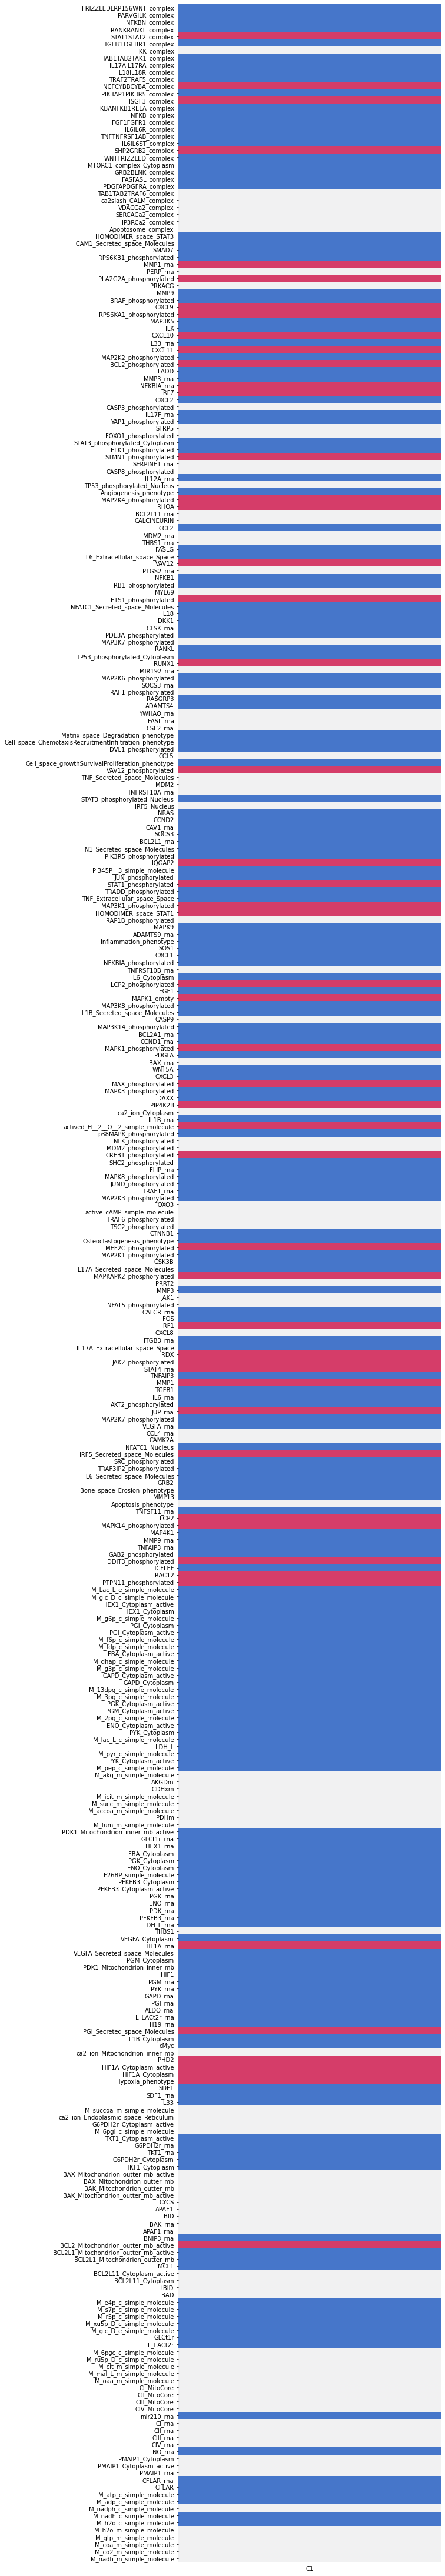

In [10]:
plt.figure(figsize=(8,80))

sns.heatmap(df, center=0, cmap=cmp, cbar=False)

Propagated inputs for a specific input condition can also be mapped on the regulatory graph using the same color code.

In [13]:
fixed = data[0]

show_fixed(lrg, styler_fixed, fixed, save="RASF-model_value_propagation.svg")

/notebook/persistent/Sahar/RASF-model_value_propagation.svg

# 3. Identification of RASF-model's trap-spaces 

## 3.1. Using the output of value propagation as a new set of initial conditions

The biolqm.perturbation function enables the construction of a variant of the model, where the logical function of one or several components has been modified. A textual parameter describes the modification:

    component%0 defines a knockout of a component
    component%1 defines an ectopic expression
    
To perturbate the model, the output dataframe of value propagation is transformed as a list of perturbations in the form **'component1%value component2%value ... componentN%value'**.

In [14]:
df = df[df.C1 >= 0]
df["modifs"]= df.index.map(str) + "%" + df["C1"].map(str) 
modifications = pd.DataFrame(df["modifs"]).copy()
modifications = modifications.reset_index(drop=True)
pert = modifications["modifs"].tolist()
perturbations = " ".join(pert)

In [15]:
RASF_model_perturbated = biolqm.perturbation(RASF_model, perturbations)

## 3.2. Identification of RASF-model's regulatory trap-spaces

A trap-space, also called stable motif or called symbolic steady state, is a partially assigned state such that all possible successors of all states which belong to the motif also belong to the motif. Like stable states, these stable motifs can be identified efficiently using constraint-solving methods.

In [16]:
trapspaces = biolqm.trapspace(RASF_model_perturbated)

In [17]:
trapspaces_df = pd.DataFrame(trapspaces)
trapspaces_df

,FRIZZLEDLRP156WNT_complex,PARVGILK_complex,NFKBN_complex,RANKRANKL_complex,STAT1STAT2_complex,TGFB1TGFBR1_complex,IKK_complex,TAB1TAB2TAK1_complex,IL17AIL17RA_complex,IL18IL18R_complex,TRAF2TRAF5_complex,NCFCYBBCYBA_complex,PIK3AP1PIK3R5_complex,ISGF3_complex,IKBANFKB1RELA_complex,NFKB_complex,FGF1FGFR1_complex,IL6IL6R_complex,TNFTNFRSF1AB_complex,IL6IL6ST_complex,SHP2GRB2_complex,WNTFRIZZLED_complex,MTORC1_complex_Cytoplasm,GRB2BLNK_complex,FASFASL_complex,PDGFAPDGFRA_complex,TAB1TAB2TRAF6_complex,ca2slash_CALM_complex,VDACCa2_complex,SERCACa2_complex,IP3RCa2_complex,Apoptosome_complex,HOMODIMER_space_STAT3,ICAM1_Secreted_space_Molecules,SMAD7,RPS6KB1_phosphorylated,MMP1_rna,PERP_rna,PLA2G2A_phosphorylated,PRKACG,MMP9,BRAF_phosphorylated,CXCL9,RPS6KA1_phosphorylated,MAP3K5,ILK,CXCL10,IL33_rna,CXCL11,MAP2K2_phosphorylated,BCL2_phosphorylated,FADD,MMP3_rna,NFKBIA_rna,IRF7,CXCL2,CASP3_phosphorylated,IL17F_rna,YAP1_phosphorylated,SFRP5,FOXO1_phosphorylated,STAT3_phosphorylated_Cytoplasm,ELK1_phosphorylated,STMN1_phosphorylated,SERPINE1_rna,CASP8_phosphorylated,IL12A_rna,TP53_phosphorylated_Nucleus,Angiogenesis_phenotype,MAP2K4_phosphorylated,RHOA,BCL2L11_rna,CALCINEURIN,CCL2,MDM2_rna,THBS1_rna,FASLG,IL6_Extracellular_space_Space,VAV12,PTGS2_rna,NFKB1,RB1_phosphorylated,MYL69,ETS1_phosphorylated,NFATC1_Secreted_space_Molecules,IL18,DKK1,CTSK_rna,PDE3A_phosphorylated,MAP3K7_phosphorylated,RANKL,TP53_phosphorylated_Cytoplasm,RUNX1,MIR192_rna,MAP2K6_phosphorylated,SOCS3_rna,RAF1_phosphorylated,RASGRP3,ADAMTS4,YWHAQ_rna,FASL_rna,CSF2_rna,Matrix_space_Degradation_phenotype,Cell_space_ChemotaxisRecruitmentInfiltration_phenotype,DVL1_phosphorylated,CCL5,Cell_space_growthSurvivalProliferation_phenotype,VAV12_phosphorylated,TNF_Secreted_space_Molecules,MDM2,TNFRSF10A_rna,STAT3_phosphorylated_Nucleus,IRF5_Nucleus,NRAS,CCND2,CAV1_rna,SOCS3,BCL2L1_rna,FN1_Secreted_space_Molecules,PIK3R5_phosphorylated,IQGAP2,PI345P__3_simple_molecule,JUN_phosphorylated,STAT1_phosphorylated,TRADD_phosphorylated,TNF_Extracellular_space_Space,MAP3K1_phosphorylated,HOMODIMER_space_STAT1,RAP1B_phosphorylated,MAPK9,ADAMTS9_rna,Inflammation_phenotype,SOS1,CXCL1,NFKBIA_phosphorylated,TNFRSF10B_rna,IL6_Cytoplasm,LCP2_phosphorylated,FGF1,MAPK1_empty,MAP3K8_phosphorylated,IL1B_Secreted_space_Molecules,CASP9,MAP3K14_phosphorylated,BCL2A1_rna,CCND1_rna,MAPK1_phosphorylated,PDGFA,BAX_rna,WNT5A,CXCL3,MAX_phosphorylated,MAPK3_phosphorylated,DAXX,PIP4K2B,ca2_ion_Cytoplasm,IL1B_rna,actived_H__2__O__2_simple_molecule,p38MAPK_phosphorylated,NLK_phosphorylated,MDM2_phosphorylated,CREB1_phosphorylated,SHC2_phosphorylated,FLIP_rna,MAPK8_phosphorylated,JUND_phosphorylated,TRAF1_rna,MAP2K3_phosphorylated,FOXO3,active_cAMP_simple_molecule,TRAF6_phosphorylated,TSC2_phosphorylated,CTNNB1,Osteoclastogenesis_phenotype,MEF2C_phosphorylated,MAP2K1_phosphorylated,GSK3B,IL17A_Secreted_space_Molecules,MAPKAPK2_phosphorylated,PRRT2,MMP3,JAK1,NFAT5_phosphorylated,CALCR_rna,FOS,IRF1,CXCL8,ITGB3_rna,IL17A_Extracellular_space_Space,RDX,JAK2_phosphorylated,STAT4_rna,TNFAIP3,MMP1,TGFB1,IL6_rna,AKT2_phosphorylated,JUP_rna,MAP2K7_phosphorylated,VEGFA_rna,CCL4_rna,CAMK2A,NFATC1_Nucleus,IRF5_Secreted_space_Molecules,SRC_phosphorylated,TRAF3IP2_phosphorylated,IL6_Secreted_space_Molecules,GRB2,Bone_space_Erosion_phenotype,MMP13,Apoptosis_phenotype,TNFSF11_rna,LCP2,MAPK14_phosphorylated,MAP4K1,MMP9_rna,TNFAIP3_rna,GAB2_phosphorylated,DDIT3_phosphorylated,TCFLEF,RAC12,PTPN11_phosphorylated,M_Lac_L_e_simple_molecule,M_glc_D_c_simple_molecule,HEX1_Cytoplasm_active,HEX1_Cytoplasm,M_g6p_c_simple_molecule,PGI_Cytoplasm,PGI_Cytoplasm_active,M_f6p_c_simple_molecule,M_fdp_c_simple_molecule,FBA_Cytoplasm_active,M_dhap_c_simple_molecule,M_g3p_c_simple_molecule,GAPD_Cytoplasm_active,GAPD_Cytoplasm,M_13dpg_c_simple_molecule,M_3pg_c_simple_molecule,PGK_Cytoplasm_active,PGM_Cytoplasm_active,M_2pg_c_simple_molecule,ENO_Cytoplasm_active,PYK_Cytoplasm,M_lac_L_c_simple_molecule,LDH_L,M_pyr_c_simple_molecule,PYK_Cytoplasm_act

# 4. Projection of regulatory trap-spaces on metabolic compounds

## 4.1. Extraction of metabolic compounds 

To extract common enzymes and metabolites between MitoCore and the RASF-model we generate:

- The list of enzymes in MitoCore;
- The list of metabolites in MitoCore;
- The list of compounds (both enzymes and metabolites) in the RASF-model.

These list are used to compare both models and automatically extract common components (with their class: "metabolic enzyme" or "metabolite"). We exclude common metabolic intermediates.

In [18]:
MitoCore_Enzymes = [r.id for r in MitoCore.reactions]

MitoCore_Metabolites = [m.id for m in MitoCore.metabolites]

RASF_model_components = [n.getName().replace('_simple_molecule', '').replace('_active', '').replace('M_', '').replace('_Cytoplasm', '') for n in RASF_model.getComponents()]

### 4.1.1. Extracting common metabolic enzymes

In [19]:
common_enzymes = list((set(RASF_model_components).intersection(MitoCore_Enzymes)))

### 4.1.2. Extracting common metabolites

We limit the metabolite matching by excluding a list of predefined compounds which are considered by MitoCore as metabolites but are common metabolic intermediates.

In [20]:
intermediates = ["atp_c", "adp_c", "adn_c", "adp_m", "amp_c", "amp_m", "atp_m", "cdp_m", "cmp_c", "co_c", "co_e",
                 "co2_c", "co2_e", "co2_m", "coa_c", "coa_m", "ctp_c", "fe2_c", "fe2_e", "fe2_m", "ficytC_c",
                 "ficytC_e", "ficytC_m", "gdp_c", "gdp_m", "gtp_c", "gtp_m", "h_c", "h_e", "h_m", "h2o_c", "h2o_m",
                 "h2o2_c"," h2o2_m", "hco3_c", "hco3_e", "hco3_m", "nad_c", "nad_e", "nad_m", "nadh_c", "nadh_e",
                 "nadh_m", "nadp_c", "nadp_m", "nadph_c", "nadph_m", "no_c", "no_e", "o2_c", "o2_e", "o2_m", "o2s_m",
                 "pheme_c", "pheme_m", "pi_c", "pi_e", "pi_m", "q10_m", "q10h2_m"]

In [21]:
common_metabolites = list(set(RASF_model_components).intersection(MitoCore_Metabolites)-set(intermediates))

## 4.2. Projecting metabolic components' regulatory trap-spaces

### 4.2.1. Projecting metabolic enzymes' regulatory trap-spaces

In [22]:
trapspaces_df.columns = trapspaces_df.columns.str.replace("_Cytoplasm","").str.replace("_simple_molecule","").str.replace("M_","")

coltofiler = np.intersect1d(trapspaces_df.columns.values,common_enzymes)
trapspaces_metabolic_enzymes = trapspaces_df[coltofiler]

trapspaces_metabolic_enzymes

,AKGDm,CIII_MitoCore,CII_MitoCore,CIV_MitoCore,CI_MitoCore,ENO,FBA,G6PDH2r,GAPD,GLCt1r,HEX1,ICDHxm,LDH_L,L_LACt2r,PDHm,PGI,PGK,PYK,TKT1
0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1
1,0,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1
2,0,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1
3,0,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1
4,0,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1
5,0,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1
6,0,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1
7,0,0,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1


### 4.2.2. Projecting metabolites' regulatory trap-spaces

In [23]:
coltofiler = np.intersect1d(trapspaces_df.columns.values,common_metabolites)
trapspaces_metabolites = trapspaces_df[coltofiler]

trapspaces_metabolites

,13dpg_c,2pg_c,3pg_c,6pgc_c,6pgl_c,accoa_m,akg_m,cit_m,dhap_c,e4p_c,f6p_c,fdp_c,fum_m,g3p_c,g6p_c,glc_D_c,glc_D_e,icit_m,lac_L_c,mal_L_m,oaa_m,pep_c,pyr_c,r5p_c,ru5p_D_c,s7p_c,succ_m,succoa_m,xu5p_D_c
0,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,0,1,0,0,1
1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,0,1,0,0,1
2,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,0,1,0,0,1
3,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,0,1,0,0,1
4,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,0,1,0,0,1
5,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,0,1,0,0,1
6,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,0,1,0,0,1
7,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,0,1,0,0,1


# 5. Flux Balance Analysis (FBA)

Definition of an **ATP_total** objective function representing maximum cellular ATP production through glycolysis and oxidative phosphorylation:

In [24]:
MitoCore.objective = ["PYK", "PGK", "CV_MitoCore"]

## 5.1. FBA n°1: Control

In [25]:
ATP_total_CTL = MitoCore.optimize().objective_value

In [26]:
MitoCore.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
acac_e,EX_acac_e,0.114,4,2.49%
ala_L_e,EX_ala_L_e,0.01,3,0.16%
arg_L_e,EX_arg_L_e,0.007,6,0.23%
asn_L_e,EX_asn_L_e,0.01,4,0.22%
asp_L_e,EX_asp_L_e,0.154,4,3.36%
bhb_e,EX_bhb_e,0.048,4,1.05%
but_e,EX_but_e,0.006,4,0.13%
cyan_e,EX_cyan_e,0.001,1,0.01%
cys_L_e,EX_cys_L_e,0.001,3,0.02%
glc_D_e,EX_glc_D_e,0.9,6,29.48%


In [27]:
solution = MitoCore.optimize()

ATP_glycolysis_CTL = (solution.fluxes['PYK'] + solution.fluxes['PGK'])/(solution.objective_value)

print("The proportion of global ATP production through glycolysis in control conditions is", round(ATP_glycolysis_CTL, 4), ".")

The proportion of global ATP production through glycolysis in control conditions is 0.0405 .


## 5.2. FBA n°2: RASF-specific

### 5.2.1. Constraining metabolic fluxes with regulatory trap-spaces 

#### 5.2.1.1. Constraining metabolic fluxes with maximum metabolic enzymes' regulatory trap-spaces equal to 0

In [28]:
trapspaces_metabolic_enzymes_zero = trapspaces_metabolic_enzymes.loc[:,(trapspaces_metabolic_enzymes.max(axis=0)) == 0]
enzymes_to_zero = trapspaces_metabolic_enzymes_zero.columns.values.tolist()

enzymes_to_zero

['AKGDm',
 'CIII_MitoCore',
 'CII_MitoCore',
 'CIV_MitoCore',
 'CI_MitoCore',
 'ICDHxm',
 'PDHm']

Setting the constraints:

In [29]:
for i in enzymes_to_zero:
    MitoCore.reactions.get_by_id(i).lower_bound = 0
    MitoCore.reactions.get_by_id(i).upper_bound = 0

#### 5.2.1.2. Constraining metabolic fluxes with maximal metabolites' regulatory trap-spaces eual to 0

In [30]:
trapspaces_metabolites_zero = trapspaces_metabolites.loc[:,(trapspaces_metabolites.max(axis=0)) == 0]
metabolites_to_zero = trapspaces_metabolites_zero.columns.values.tolist()

metabolites_to_zero

['6pgc_c',
 '6pgl_c',
 'accoa_m',
 'akg_m',
 'cit_m',
 'fum_m',
 'icit_m',
 'mal_L_m',
 'oaa_m',
 'ru5p_D_c',
 'succ_m',
 'succoa_m']

In [31]:
producing_reactions_metabolite_to_zero  = []

for i in metabolites_to_zero:
    producing_reactions_metabolite_to_zero1 = MitoCore.metabolites.get_by_id(i).summary().producing_flux.index.values.tolist()
    producing_reactions_metabolite_to_zero  = producing_reactions_metabolite_to_zero + producing_reactions_metabolite_to_zero1

Setting the constraints:

In [32]:
for i in producing_reactions_metabolite_to_zero:
    MitoCore.reactions.get_by_id(i).lower_bound = 0
    MitoCore.reactions.get_by_id(i).upper_bound = 0

## 5.2. FBA

In [33]:
ATP_total_RASF = MitoCore.optimize().objective_value

In [34]:
MitoCore.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
asn_L_e,EX_asn_L_e,0.01,4,0.65%
asp_L_e,EX_asp_L_e,0.154,4,10.01%
glc_D_e,EX_glc_D_e,0.9,6,87.72%
gly_e,EX_gly_e,0.005,2,0.16%
glyc_e,EX_glyc_e,0.01,3,0.49%
h2o_e,EX_h2o_e,0.055,0,0.00%
his_L_e,EX_his_L_e,0.01,6,0.97%
Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_e,-0.01,2,0.32%
ala_L_e,EX_ala_L_e,-0.164,3,7.99%


In [35]:
solution = MitoCore.optimize()

ATP_glycolysis_RASF = (solution.fluxes['PYK'] + solution.fluxes['PGK'])/(solution.objective_value)

print("The proportion of global ATP production through glycolysis in RASF-specific conditions is", round(ATP_glycolysis_RASF, 4), ".")

The proportion of global ATP production through glycolysis in RASF-specific conditions is 0.8505 .
